## We will look at the expected value of aiming at the bullseye and aiming at the triple 20 over different standard deviations in throwing

In [1]:
import params
import expected_value
import numpy as np
import approximate_regions
import triangulate_helper

##### Prepare data

In [2]:
approximate_regions.output_all_contours(1, 'BoardPoints')
triangulate_helper.output_triangles('BoardPoints', 'Triangles')

'Triangles'

#### Bullseye

In [5]:
bullseye_scores = []

for sd in [(i + 1) for i in range(100)]:
    print(sd)
    bullseye_scores.append((sd, expected_value.expected_value('Triangles', (0,0), sd)))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


#### Center of triple 20

In [7]:
r = (params.radii_mm['triple_outer'] + params.radii_mm['triple_inner']) / 2
theta=params.start_angles[20] + 9
center_20 = (r * np.cos(np.deg2rad(theta)), r * np.sin(np.deg2rad(theta)))

center_20_scores = []

for sd in [(i + 1) for i in range(100)]:
    print(sd)
    center_20_scores.append((sd, expected_value.expected_value('Triangles', center_20, sd)))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


#### PLOT!

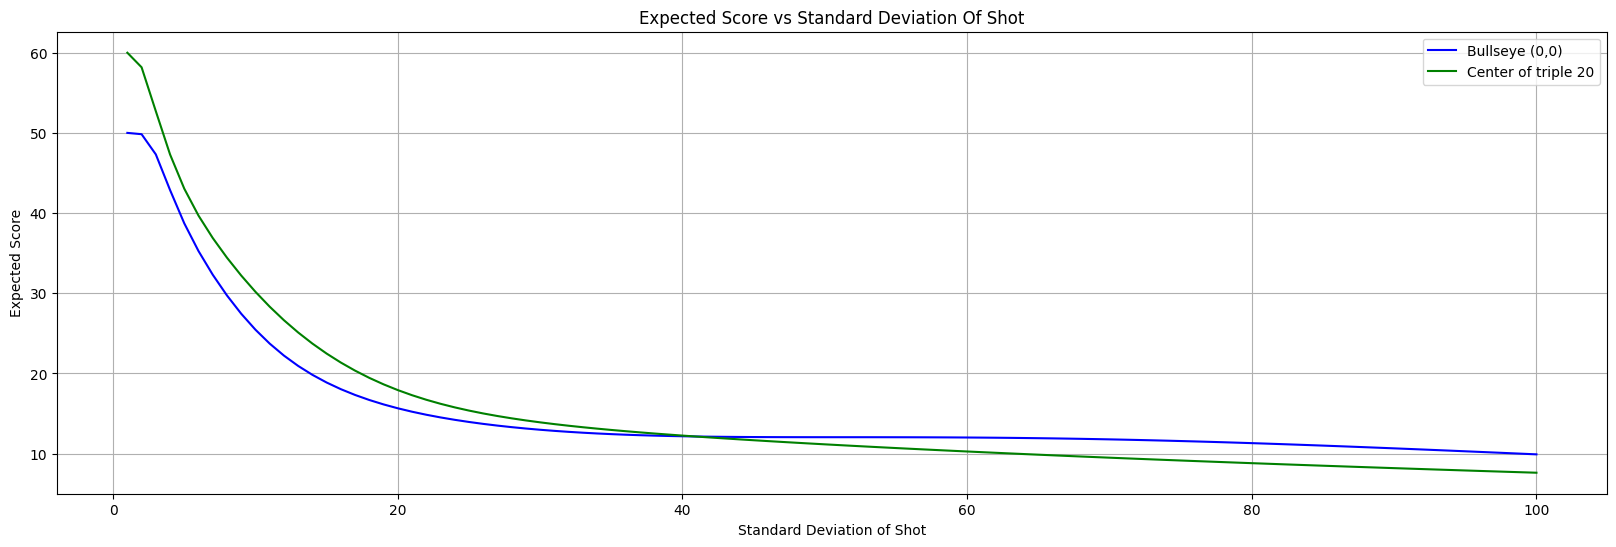

In [8]:
import matplotlib.pyplot as plt

# Extract x (standard deviations) and y (expected values) for both
x_vals = [x for x, _ in bullseye_scores]
y_bullseye = [y for _, y in bullseye_scores]
y_center20 = [y for _, y in center_20_scores]

# Plot
plt.figure(figsize=(20, 6))
plt.plot(x_vals, y_bullseye, label='Bullseye (0,0)', color='blue')
plt.plot(x_vals, y_center20, label='Center of triple 20', color='green')
plt.xlabel('Standard Deviation of Shot')
plt.ylabel('Expected Score')
plt.title('Expected Score vs Standard Deviation Of Shot')
plt.legend()
plt.grid(True)
plt.show()

### Find the intersection point

In [9]:
lo = 1
hi = 100
mid = (hi + lo) / 2

while (hi - lo > 0.05):
    mid = (hi + lo) / 2

    if (expected_value.expected_value('Triangles', (0,0), mid) < expected_value.expected_value('Triangles', center_20, mid)):
        # bullseye is less so we need to increase sd
        lo = mid
    else:
        # we need more
        hi = mid

print(mid)

40.88037109375
